# Etude de marché pour La poule qui chante (Préparation des données)

# Sommaire


* [1. Importation des librairies et des fichiers](#1)
    * [1.1 Importation des librairies](#1_1)
    * [1.2 Importation des fichiers](#1_2)
* [2. Analyse des différents fichiers](#2)
    * [2.1 Visualisation des différents fichiers](#2_1)
    * [2.2 Merge des fichiers rajoutés](#2_2)
    * [2.3 Disponibilité alimentaire](#2_3)
    * [2.4 Population](#2_4)
    * [2.5 Merge des Dataframes](#2_5)
    * [2.6 Doublons et valeurs manquantes](#2_6)
* [3. Analyse des données manquantes](#3)
    * [3.1 Exportations - Quantité](#3_1)
    * [3.2 Les autres valeurs manquantes](#3_2)
* [4. Calcul du taux d'autosuffisance alimentaire](#4)
* [5. Corrélation et distribution des données](#5)
    * [5.1 Analyse des corrélations](#5_1)
    * [5.2 Distribution des données](#5_2)
* [6. Etude des outliers](#6) 
    * [6.1 Observations des outliers du Dataframe](#6_1)
        * [6.1.1 Disponibilité intérieure](#6_1_1)
        * [6.1.2 Exportations - Quantité](#6_1_2)
        * [6.1.3 Importations - Quantité](#6_1_3)
        * [6.1.4 Population](#6_1_4)
        * [6.1.5 PIB](#6_1_5)
        * [6.1.6 Emission de CO2](#6_1_6)
        * [6.1.7 TAS](#6_1_7)
    * [6.2 Conclusion de l'étude des outliers](#6_2)
    * [6.3 Solution au fait de garder les outliers](#6_3)
    * [6.4 Distribution des données après passage au logarithme](#6_4)
* [7. Analyse en Composantes Principales (ACP)](#7)
    * [7.1 Séparation des données](#7_1)
    * [7.2 Centrer et réduire les données](#7_2)
    * [7.3 Composantes et pourcentages de variance captés par celles-ci](#7_3)
    * [7.4 Graphiques de correlation](#7_4)
        * [7.4.1 Pour les composantes principales 1 et 2 (F1 et F2)](#7_4_1)
        * [7.4.2 Projection des pays sur le plan F1 et F2](#7_4_2)
        * [7.4.3 Pour les composantes principales 3 et 4 (F3 et F4)](#7_4_3)
        * [7.4.4 Projection des pays sur le plan F3 et F4](#7_4_4)
        * [7.4.5 Interprétation des 4 premières composantes principales](#7_4_5)
* [8. Export du Dataframe pour clustering](#8)

## 1. Importation des librairies et des fichiers <a class="anchor" id="1"></a>

### 1.1 Importation des librairies <a class="anchor" id="1_1"></a>

In [1]:
# Exploration des données et calculs
import pandas as pd
import numpy as np
import math

# Imputer (pour valeurs manquantes)
from sklearn.impute import KNNImputer

# Pour l'ACP
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorer tous les avertissements
import warnings
warnings.filterwarnings("ignore")

### 1.2 Importation des fichiers <a class="anchor" id="1_2"></a>

In [2]:
# Fichiers fournis
Dispo_alim = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
Population = pd.read_csv('Population_2000_2018.csv')

# Fichiers rajoutés pour analyse PESTEL (données 2017)
Stab_pol = pd.read_csv('Stabilité_politique_2017.csv')
Pib = pd.read_csv('PIB_2017.csv')
Emiss_CO2 = pd.read_csv('Emission_CO2_2017.csv')

## 2. Analyse des différents fichiers <a class="anchor" id="2"></a>

### 2.1 Visualisation des différents fichiers <a class="anchor" id="2_1"></a>

In [3]:
Dispo_alim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
Population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [5]:
Stab_pol.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2017
0,Aruba,ABW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,95.714287
1,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.PER.RNK,0.476190
2,Angola,AGO,Political Stability and Absence of Violence/Te...,PV.PER.RNK,30.476191
3,Albanie,ALB,Political Stability and Absence of Violence/Te...,PV.PER.RNK,59.523811
4,Andorre,AND,Political Stability and Absence of Violence/Te...,PV.PER.RNK,97.142860


In [6]:
Pib.head()

,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,1.889635e+04,X,Ciffre de sources internationales,NaN
1,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,3.808514e+05,X,Ciffre de sources internationales,NaN
2,Albanie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,1.301973e+04,X,Ciffre de sources internationales,NaN
3,Algérie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,1.700970e+05,X,Ciffre de sources internationales,NaN
4,Allemagne,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,3.690849e+06,X,Ciffre de sources internationales,NaN


In [7]:
Emiss_CO2.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Code source,Source,Unité,Valeur,Symbole,Description du Symbole,Note
0,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2),67292,Sols organiques drainés (CO2),2017,2017,3050,FAO TIER 1,kilotonnes,7174.3770,E,Valeur estimée,NaN
1,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2),6994,On-farm energy use,2017,2017,3050,FAO TIER 1,kilotonnes,7272.5066,E,Valeur estimée,NaN
2,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2),6751,Terres forestières,2017,2017,3050,FAO TIER 1,kilotonnes,-558.5872,E,Valeur estimée,NaN
3,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2),6750,Conversion nette de forêt,2017,2017,3050,FAO TIER 1,kilotonnes,46.5931,E,Valeur estimée,NaN
4,GT,Totaux des émissions,528,Pays-Bas (Royaume des),7273,Émissions (CO2),6993,Feux de tourbières,2017,2017,3050,FAO TIER 1,kilotonnes,0.0000,E,Valeur estimée,NaN


### 2.2 Merge des fichiers rajoutés <a class="anchor" id="2_2"></a>

In [8]:
# Garder seulement les colonnes qui nous intéressent
Stab_pol_2017 = Stab_pol[['Country Name', '2017']].rename(columns={'Country Name':'Zone',
                                                                   '2017': 'Stabilité politique'})
Pib_2017 = Pib[['Zone', 'Valeur']].rename(columns={'Valeur': 'PIB'})
Emiss_CO2_2017 = Emiss_CO2[['Zone', 'Valeur']].rename(columns={'Valeur': 'Emission de CO2'}).groupby(['Zone']).sum()

# Merges
df1 = pd.merge(Stab_pol_2017, Pib_2017, on='Zone', how='left')
df1 = pd.merge(df1, Emiss_CO2_2017, on='Zone', how='left')

# Vérification des jointures
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Zone                 205 non-null    object 
 1   Stabilité politique  205 non-null    float64
 2   PIB                  196 non-null    float64
 3   Emission de CO2      198 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.0+ KB


### 2.3 Disponibilité alimentaire <a class="anchor" id="2_3"></a>

In [9]:
# Vérifions la taille du dataframe des disponibilités alimentaires
Dispo_alim.shape

(176600, 14)

Nous pouvons constater que le DataFrame comporte un grand nombre de lignes.

Examinons les différents produits qui sont référencés.

In [10]:
Dispo_alim['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

Intéressons-nous seulement à 'Viande de Volailles' pour la suite de l'étude.

In [11]:
# Création d'un dataframe qui ne comportera que les données sur la viande de volailles
Dispo_volaille = Dispo_alim.loc[Dispo_alim['Produit'] == 'Viande de Volailles'].reset_index()
Dispo_volaille.head()

,index,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
1,652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
2,653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
3,654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
4,655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


Le Dataframe fait référence à plusieurs éléments, regardons cela.

In [12]:
# Regardons quelles sont les valeurs de la colonne 'Element'
Dispo_volaille['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

Nous allons donc utiliser ces éléments comme variables. Cependant les données ont l'air d'avoir différentes unités.

In [13]:
# Regardons les différentes unités
Dispo_volaille['Unité'].unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

Il y a en effet plusieurs unités, une fois que les valeurs seront centrées et réduites cela n'aura pas d'impact pour la suite.

Nous allons donc réaliser un pivot pour avoir les différents éléments en variables. 

In [14]:
# Pivot afin d'avoir les valeurs de la colonne 'Élément' en variables, les futures valeurs se trouvant dans la colonne 'Valeur' 
Dispo_volaille = Dispo_volaille.pivot(index = 'Zone', columns = 'Élément', values = 'Valeur').reset_index()
Dispo_volaille.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,-0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [15]:
# Examinons notre nouveau dataframe
Dispo_volaille.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           172 non-null    object 
 1   Alimentation pour touristes                                    78 non-null     float64
 2   Aliments pour animaux                                          1 non-null      float64
 3   Autres utilisations (non alimentaire)                          34 non-null     float64
 4   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 6   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 7   Disponibilité de protéines en quantité (g/personne/jour)      

Supprimons les colonnes pour lesquelles nous avons très peu d'informations, elles ne seront pas utiles avec si peu d'éléments. 

In [16]:
# Supprimons les variables avec peu d'information
Dispo_volaille.drop(columns=['Alimentation pour touristes', 
                             'Aliments pour animaux', 'Autres utilisations (non alimentaire)', 'Pertes',
                             'Semences', 'Traitement'], inplace=True)

Nous allons maintenant nous intéresser aux variables qui vont nous permettre d'identifier clairement les pays vers lesquels nous pourrions exporter de la viande de volaille.

Nous ne garderons donc que la disponibilité intérieure, les exportations, les importations, la production et les variations de stock. 

In [17]:
# Supprimons les autres variables
Dispo_volaille.drop(columns=['Disponibilité alimentaire (Kcal/personne/jour)', 
                             'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 
                             'Disponibilité de protéines en quantité (g/personne/jour)',
                             'Nourriture', 'Résidus'], inplace=True)

### 2.4 Population <a class="anchor" id="2_4"></a>

In [18]:
# Vérifions la taille du dataframe de la population
Population.shape

(4411, 15)

Il y a visiblement beaucoup de lignes, regardons quelles années nous avons à notre disposition.

In [19]:
Population['Année'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

Les autres données étant de 2017, nous ne garderons que les informations sur la population pour l'année 2017.

In [20]:
# Création d'un nouveau Dataframe avec seulement l'année 2017
Population = Population.loc[Population['Année'] == 2017].reset_index()

# Regardons la colonne 'Unité'
Population['Unité'].unique()

array(['1000 personnes'], dtype=object)

Il va donc falloir multiplier la colonne 'Valeur' par 1000.

In [21]:
# Muliplions la colonne valeur par 1000 et nous ne garderons que les colonnes 'Zone' et 'Valeur'
Population['Valeur'] = Population['Valeur'] * 1000
Population = Population[['Zone', 'Valeur']].rename(columns={'Valeur': 'Population'})
Population.head()

,Zone,Population
0,Afghanistan,36296113.0
1,Afrique du Sud,57009756.0
2,Albanie,2884169.0
3,Algérie,41389189.0
4,Allemagne,82658409.0


In [22]:
# Examinons notre nouveau dataframe
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        236 non-null    object 
 1   Population  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


### 2.5 Merge des Dataframes <a class="anchor" id="2_5"></a>

In [23]:
# Partons du Dataframe 'Dispo_volaille'
df = pd.merge(Dispo_volaille, Population, on='Zone', how='left')
df = pd.merge(df, df1, on='Zone', how='left')
df.head()

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,Stabilité politique,PIB,Emission de CO2
0,Afghanistan,57.0,NaN,29.0,28.0,0.0,36296113.0,0.476190,1.889635e+04,10353.5539
1,Afrique du Sud,2118.0,63.0,514.0,1667.0,-0.0,57009756.0,34.761906,3.808514e+05,565193.3749
2,Albanie,47.0,0.0,38.0,13.0,4.0,2884169.0,59.523811,1.301973e+04,6477.9891
3,Algérie,277.0,0.0,2.0,275.0,0.0,41389189.0,16.190475,1.700970e+05,203031.1125
4,Allemagne,1739.0,646.0,842.0,1514.0,-29.0,82658409.0,65.714287,3.690849e+06,835013.2248


Nous avons maintenant regroupé toutes nos données dans un seul et même DataFrame.

Passons maintenant à l'évaluation de la qualité de nos données.

### 2.6 Doublons et valeurs manquantes <a class="anchor" id="2_6"></a>

In [24]:
# Ligne en double
df.duplicated().sum()

0

In [25]:
# Pourcentage de valeurs manquantes
df.isna().mean()

Zone                        0.000000
Disponibilité intérieure    0.011628
Exportations - Quantité     0.215116
Importations - Quantité     0.011628
Production                  0.023256
Variation de stock          0.017442
Population                  0.000000
Stabilité politique         0.017442
PIB                         0.023256
Emission de CO2             0.023256
dtype: float64

Certaines variables contiennent un pourcentage trop important de données manquantes...

Nous allons donc faire un travail étape par étape pour ces données manquantes.

## 3. Analyse des données manquantes <a class="anchor" id="3"></a>

### 3.1 Exportations - Quantité <a class="anchor" id="3_1"></a>

Nous avons plus de données sur les variables 'Importations - Quantité' et 'Disponibilité intérieure'.

On va donc essayer de calculer les données manquantes pour les exportations.

In [26]:
# Isolons les lignes où nous n'avons pas les données pour l'exportation
df_temp = df.loc[df['Exportations - Quantité'].isna()].reset_index()

# Prenons l'équation suivante : 
# Disponibilité intérieure = importation - exportation + production + variation de stock mais en l'adaptant pour avoir l'exportation
df_temp['Exportations - Quantité'] = df_temp['Importations - Quantité'] + df_temp['Production'] + df_temp['Variation de stock'] - df_temp['Disponibilité intérieure']

# Rapatrions les infos dans le dataframe et on va mettre les zones en index
df = df.merge(df_temp[['Zone', 'Exportations - Quantité']], on='Zone', how='left', suffixes=('', '_temp'))
df['Exportations - Quantité'].fillna(df['Exportations - Quantité_temp'], inplace=True)
df = df.drop('Exportations - Quantité_temp', axis=1).set_index('Zone')

# Supprimons les variations de stock qui ne nous servirons plus
df.drop(columns='Variation de stock', inplace=True)

# Regardons si il nous manque d'autres valeurs
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Îles Salomon
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disponibilité intérieure  170 non-null    float64
 1   Exportations - Quantité   168 non-null    float64
 2   Importations - Quantité   170 non-null    float64
 3   Production                168 non-null    float64
 4   Population                172 non-null    float64
 5   Stabilité politique       169 non-null    float64
 6   PIB                       168 non-null    float64
 7   Emission de CO2           168 non-null    float64
dtypes: float64(8)
memory usage: 12.1+ KB


### 3.2 Les autres valeurs manquantes <a class="anchor" id="3_2"></a>

Nous avons réussis à réunir une bonne quantité de données. 

Il faut maintenant utiliser une méthode pour remplacer les valeurs manquantes restantes. 

On va utiliser le KNNImputer pour remplacer les valeurs manquantes par les valeurs des plus proches voisins, ce qui sera plus cohérent que la moyenne étant donné la disparité des valeurs. En effet, chaque pays présent dans le dataframe est très différent.

In [27]:
# On va mettre les valeurs de notre dataframe dans un np.array 'X'
X = df.values

# Vérifions s'il s'agit d'un np.array
type(X)

numpy.ndarray

In [28]:
X.shape

(172, 8)

In [29]:
# On instancie le KNNImputer avec le nombre de voisins souhaité. 
# Le choix de 7 voisins est assez arbitraire, mais il devrait nous permettre d'obtenir des valeurs cohérentes.
imputer = KNNImputer(n_neighbors=7)

# On entraine le KNNImputer sur nos données et on remplace nos données manquantes par nos estimées
X_imputed = imputer.fit_transform(X)

In [30]:
# On réassigne les valeurs à notre df
df = pd.DataFrame(X_imputed, index = df.index, columns=df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Îles Salomon
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disponibilité intérieure  172 non-null    float64
 1   Exportations - Quantité   172 non-null    float64
 2   Importations - Quantité   172 non-null    float64
 3   Production                172 non-null    float64
 4   Population                172 non-null    float64
 5   Stabilité politique       172 non-null    float64
 6   PIB                       172 non-null    float64
 7   Emission de CO2           172 non-null    float64
dtypes: float64(8)
memory usage: 12.1+ KB


## 4. Calcul du taux d'autosuffisance alimentaire <a class="anchor" id="4"></a>

In [31]:
df['TAS'] = df['Production']/(df['Production']+df['Importations - Quantité']-df['Exportations - Quantité'])*100

## 5. Corrélation et distribution des données <a class="anchor" id="5"></a>

### 5.1 Analyse des corrélations <a class="anchor" id="5_1"></a>

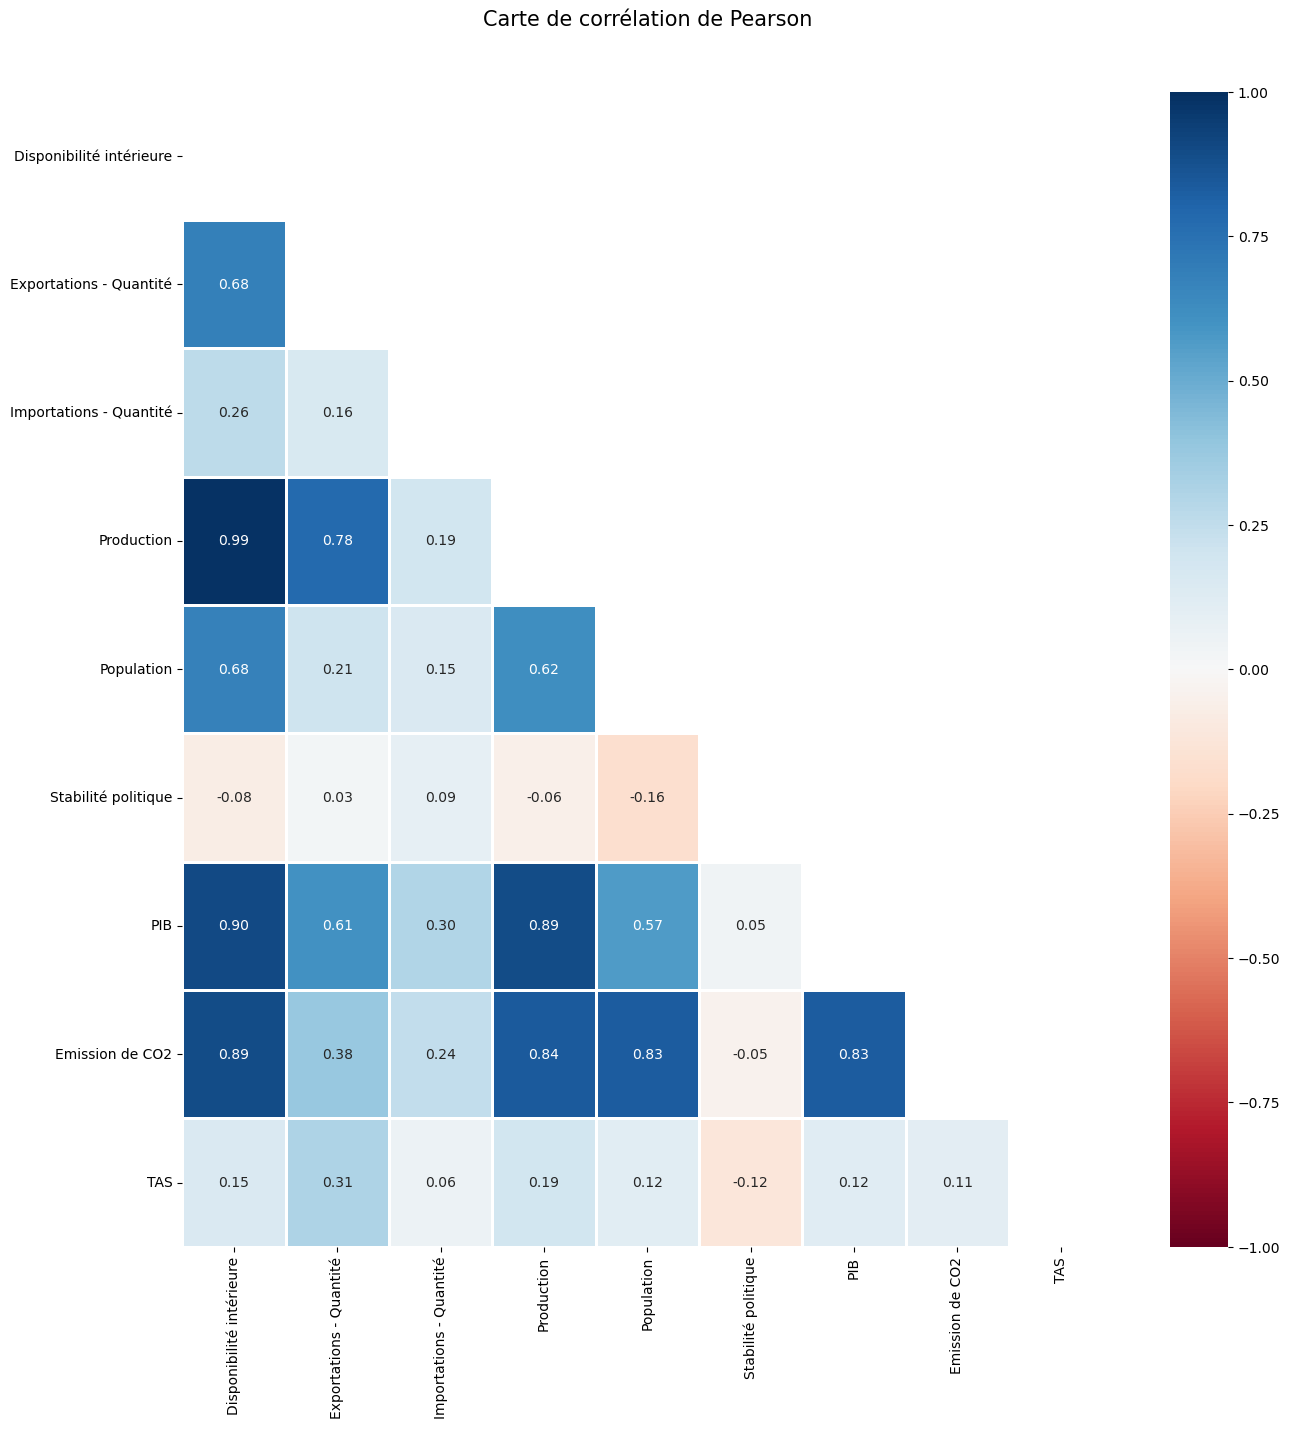

In [32]:
# Matrice de corrélation de Pearson
mask = np.triu(np.ones_like(billets.corr(), dtype=bool))
plt.figure(figsize=(7,5))
sns.heatmap(billets.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Matrice de corrélation de Pearson', fontsize=15, y=1.05)
plt.show()

Le but étant de réduire le nombre de dimensions, nous pouvons déjà choisir de supprimer les colonnes avec un très fort taux de corrélation et qui ont une signification similaire.

Les 2 variables suivantes sont très similaires : 

    - Disponibilité intérieure
    - Production

In [33]:
# Suppression des variables fortement corrélées et similaires
df.drop(columns=['Production'],inplace=True)

### 5.2 Distribution des données <a class="anchor" id="5_2"></a>

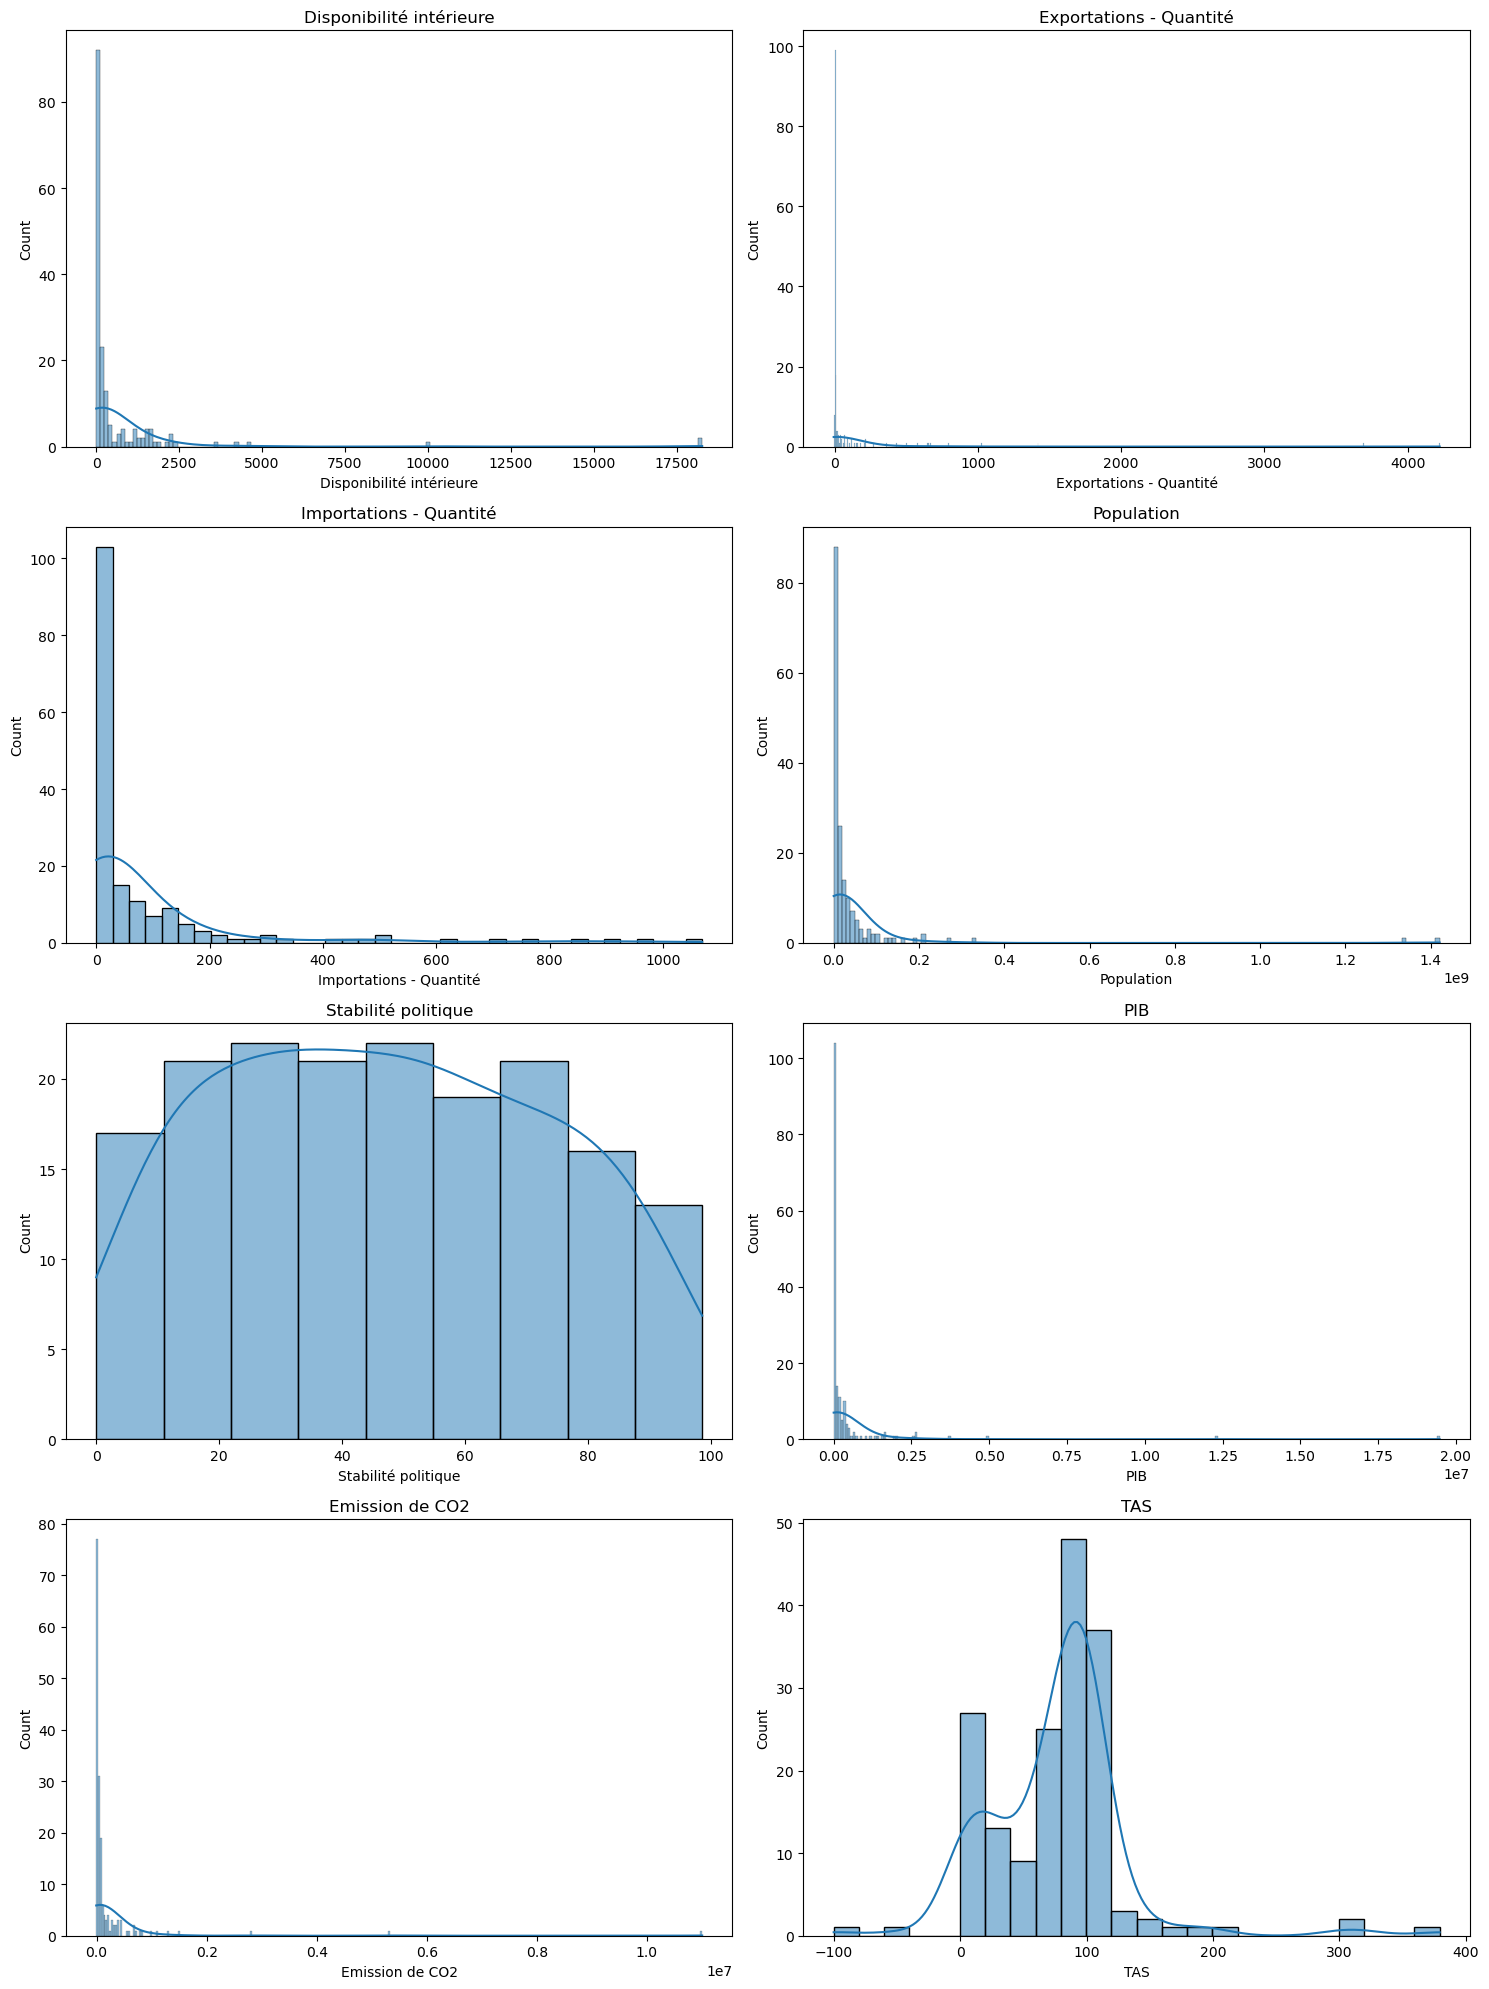

In [34]:
# Déterminer le nombre de lignes et de colonnes en fonction du nombre de variables
num_variables = len(df.columns)
num_rows = math.ceil(num_variables / 2)
num_cols = min(num_variables, 2)

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Tracer les distributions de chaque variable
for i, column in enumerate(df.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(column)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

Nous pouvons constater que les données ne suivent pas une distribution normale. De plus, les distributions sont souvent très asymétriques, ce qui implique la présence d'outliers.

## 6. Etude des outliers <a class="anchor" id="6"></a>

### 6.1 Observations des outliers du Dataframe <a class="anchor" id="6_1"></a>

Au vu du nombre de variables important, on va automatiser la chose afin de faire ressortir les outliers et les variables concernées. 

In [35]:
outliers = []

# Boucle for pour alimenter la liste des colonnes avec outliers
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_inférieure = Q1 - 1.5 * IQR
    borne_supérieure = Q3 + 1.5 * IQR
    col_outliers = df[(df[col] < borne_inférieure) | (df[col] > borne_supérieure)]
    if not col_outliers.empty:
        outliers.append(col)

print(f"Le nombre de colonnes avec outliers est de: {len(outliers)}")
print(outliers)

Le nombre de colonnes avec outliers est de: 7
['Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Population', 'PIB', 'Emission de CO2', 'TAS']


#### 6.1.1 Disponibilité intérieure <a class="anchor" id="6_1_1"></a>

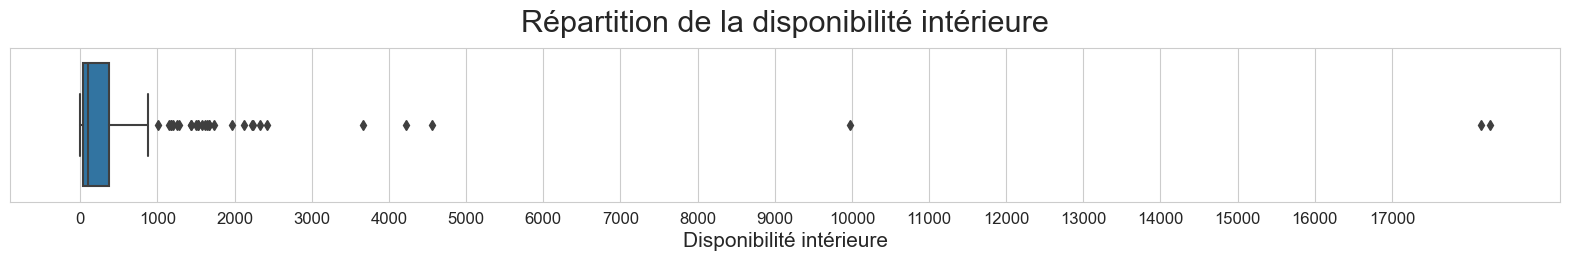

In [36]:
# Utilisons une boxplot pour visualiser cela
plt.figure(figsize=(20,2))
sns.set_style('whitegrid')
sns.boxplot(x=df['Disponibilité intérieure'])
plt.title('Répartition de la disponibilité intérieure', fontsize=22, y=1.05)
plt.xlabel('Disponibilité intérieure', fontsize=15)
plt.xticks(np.arange(0,18000,1000))
plt.tick_params(labelsize=12)
plt.show()

In [37]:
# Calculons Q1 et Q3
Q1 = df['Disponibilité intérieure'].quantile(0.25)
Q3 = df['Disponibilité intérieure'].quantile(0.75)

# Calculons ensuite l'écart intercartile 'IQR'
IQR = Q3 - Q1

# Déterminons les bornes inférieure et supérieure de l'écart interquartile
borne_inférieure = Q1-1.5*IQR
borne_supérieure = Q3+1.5*IQR

#Identifions les outliers
outliers_dispo = df[(df['Disponibilité intérieure'] < borne_inférieure) | (df['Disponibilité intérieure'] > borne_supérieure)]
outliers_dispo.sort_values('Disponibilité intérieure', ascending=False)

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,Stabilité politique,PIB,Emission de CO2,TAS
Zone,,,,,,,,
États-Unis d'Amérique,18266.0,3692.0,123.0,3.250848e+08,57.142857,1.947734e+07,5.299950e+06,119.454892
"Chine, continentale",18161.0,576.0,452.0,1.421022e+09,38.571430,1.231049e+07,1.100407e+07,100.684629
Brésil,9982.0,4223.0,3.0,2.078338e+08,29.523809,2.063515e+06,9.927581e+05,142.280333
Fédération de Russie,4556.0,115.0,226.0,1.455301e+08,23.809525,1.574199e+06,1.479487e+06,97.563117
Mexique,4219.0,9.0,972.0,1.247773e+08,17.619047,1.158912e+06,5.742128e+05,77.136752
Inde,3661.0,4.0,0.0,1.338677e+09,18.571428,2.624329e+06,2.797825e+06,100.112962
Japon,2415.0,10.0,1069.0,1.275027e+08,88.571426,4.930837e+06,1.286543e+06,67.654246
Indonésie,2323.0,0.0,1.0,2.646510e+08,29.047619,1.015619e+06,1.101066e+06,99.956560
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,2234.0,359.0,779.0,6.672746e+07,60.476189,2.683399e+06,4.368504e+05,81.199642


Nous pouvons constater qu'il s'agit de valeurs extrêmes et non de valeurs aberrantes. Ici, nous avons les 30 pays affichant la plus grande disponibilité intérieure en termes de volaille.

#### 6.1.2 Exportations - Quantité <a class="anchor" id="6_1_2"></a>

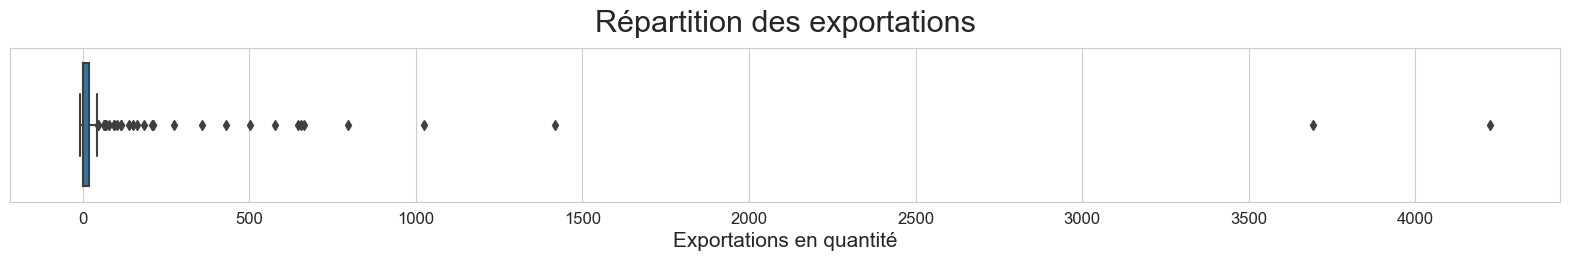

In [38]:
# Utilisons une boxplot pour visualiser cela
plt.figure(figsize=(20,2))
sns.set_style('whitegrid')
sns.boxplot(x=df['Exportations - Quantité'])
plt.title('Répartition des exportations', fontsize=22, y=1.05)
plt.xlabel('Exportations en quantité', fontsize=15)
plt.xticks(np.arange(0,4500,500))
plt.tick_params(labelsize=12)
plt.show()

#### 6.1.3 Importations - Quantité <a class="anchor" id="6_1_3"></a>

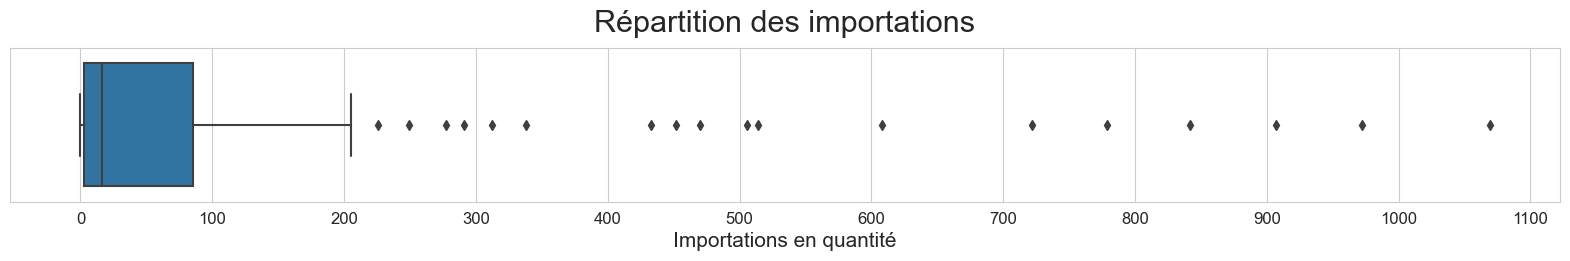

In [39]:
# Utilisons une boxplot pour visualiser cela
plt.figure(figsize=(20,2))
sns.set_style('whitegrid')
sns.boxplot(x=df['Importations - Quantité'])
plt.title('Répartition des importations', fontsize=22, y=1.05)
plt.xlabel('Importations en quantité', fontsize=15)
plt.xticks(np.arange(0,1200,100))
plt.tick_params(labelsize=12)
plt.show()

#### 6.1.4 Population <a class="anchor" id="6_1_4"></a>

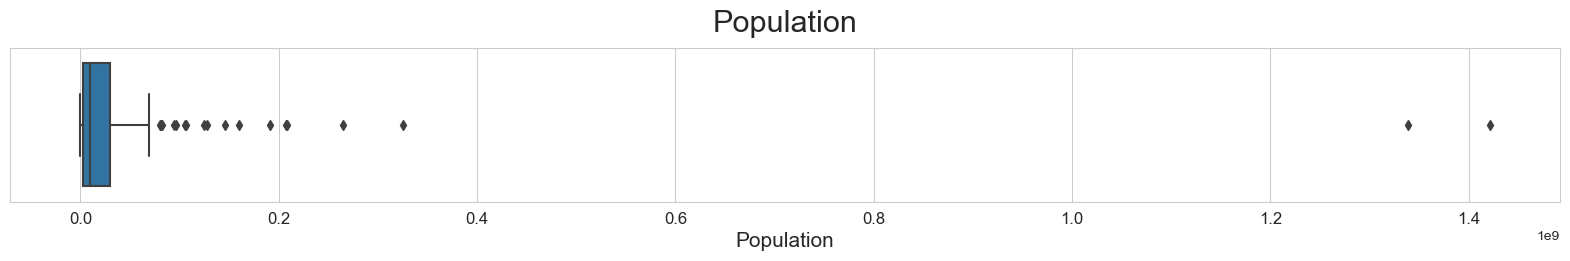

In [40]:
# Utilisons une boxplot pour visualiser cela
plt.figure(figsize=(20,2))
sns.set_style('whitegrid')
sns.boxplot(x=df['Population'])
plt.title('Population', fontsize=22, y=1.05)
plt.xlabel('Population', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

#### 6.1.5 PIB <a class="anchor" id="6_1_5"></a>

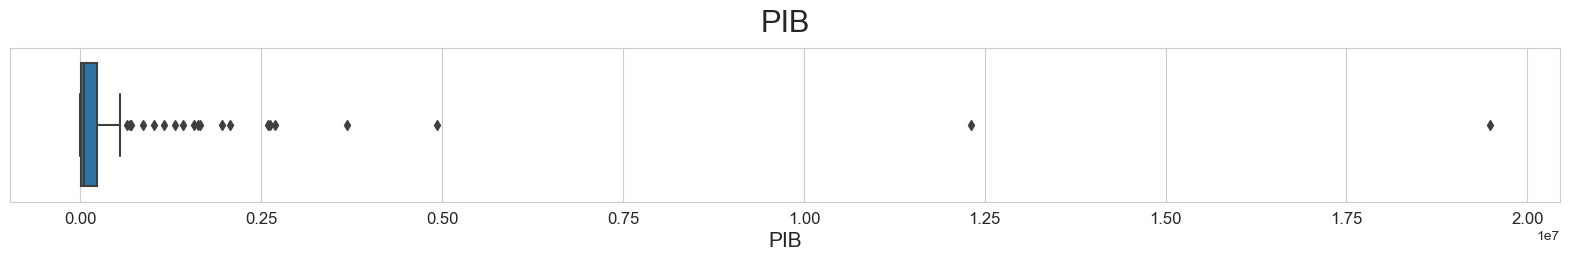

In [41]:
# Utilisons une boxplot pour visualiser cela
plt.figure(figsize=(20,2))
sns.set_style('whitegrid')
sns.boxplot(x=df['PIB'])
plt.title('PIB', fontsize=22, y=1.05)
plt.xlabel('PIB', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

#### 6.1.6 Emission de CO2 <a class="anchor" id="6_1_6"></a>

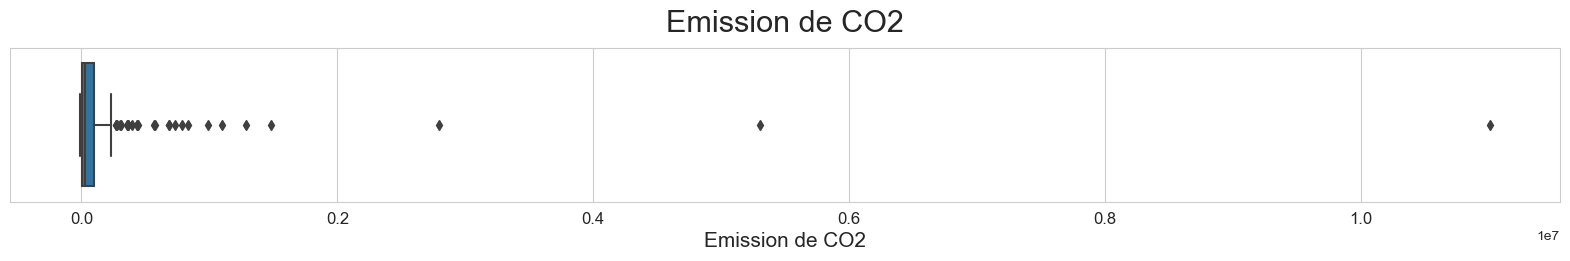

In [42]:
# Utilisons une boxplot pour visualiser cela
plt.figure(figsize=(20,2))
sns.set_style('whitegrid')
sns.boxplot(x=df['Emission de CO2'])
plt.title('Emission de CO2', fontsize=22, y=1.05)
plt.xlabel('Emission de CO2', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

#### 6.1.7 TAS <a class="anchor" id="6_1_7"></a>

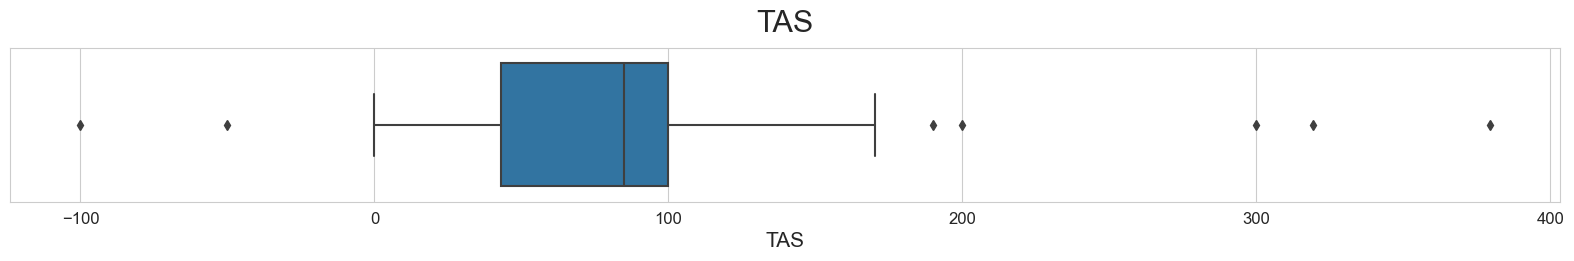

In [43]:
# Utilisons une boxplot pour visualiser cela
plt.figure(figsize=(20,2))
sns.set_style('whitegrid')
sns.boxplot(x=df['TAS'])
plt.title('TAS', fontsize=22, y=1.05)
plt.xlabel('TAS', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

### 6.2 Conclusion de l'étude des outliers <a class="anchor" id="6_2"></a>

Les outliers que nous avons observés ne sont pas des valeurs aberrantes, mais plutôt des valeurs extrêmes. En d'autres termes, ces valeurs se situent aux extrémités de la distribution en raison des fortes disparités entre les 172 pays étudiés dans le cadre de cette étude de marché. Par conséquent, nous devons conserver tous les pays pour assurer la représentativité de notre analyse.

Cependant, afin de minimiser l'impact de ces outliers sur les résultats de l'étude, nous devrons trouver une solution appropriée. Nous devons développer des méthodes ou des techniques qui permettront de les prendre en compte sans fausser les conclusions de notre étude.

### 6.3 Solution au fait de garder les outliers <a class="anchor" id="6_3"></a>

Nous allons appliquer une transfomation logarithmique sur nos données afin de réduire la plage des valeurs.

Cela va en effet comprimer les valeurs élevées et étendre les valeurs faibles, pour une meilleur interprétation et visualisation. 

In [44]:
# Avant de passer les valeurs au logarithme, il va falloir faire en sorte que nos valeurs soient positives
df.describe()

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,Stabilité politique,PIB,Emission de CO2,TAS
count,172.000000,172.000000,172.000000,1.720000e+02,172.000000,1.720000e+02,1.720000e+02,172.000000
mean,685.164452,105.182724,90.475083,4.284175e+07,46.926515,4.613320e+05,2.292884e+05,75.706132
std,2174.815772,457.838478,185.792052,1.530637e+08,26.842568,1.843595e+06,9.665811e+05,54.609593
min,2.000000,-7.000000,0.000000,5.204500e+04,0.000000,1.881820e+02,-7.851308e+03,-100.000000
25%,31.500000,0.000000,3.000000,2.874480e+06,24.642858,1.215006e+04,7.639983e+03,43.025362
50%,105.000000,2.000000,16.000000,9.757833e+06,45.952381,4.596891e+04,3.083954e+04,84.726794
75%,372.750000,17.750000,85.250000,3.013874e+07,68.690475,2.260165e+05,1.017445e+05,100.000000
max,18266.000000,4223.000000,1069.000000,1.421022e+09,98.571426,1.947734e+07,1.100407e+07,379.310345


Avec le describe, on peut voir que l'on va avoir des problèmes au moment du passage des valeurs au logarithme avec les variables : 
   
       - Exportations - Quantité
       - Emission de CO2
       - TAS
       
En effet, le passage au logarithme sur les valeurs négatives va donner des infinies. Remédions à cela :

In [45]:
# Création d'une liste avec les colonnes qui vont poser problème
problemes_col = ['Exportations - Quantité', 'Emission de CO2','TAS']

# Boucle for pour décaler toutes les valeurs par la valeur absolue maximale + une petite valeur pour éviter les divisions par zéro
for col in problemes_col: 
    max_abs_value = np.abs(df[col]).max()
    shift_value = max_abs_value + 0.1  # Ajoutez une petite valeur pour éviter les divisions par zéro
    df[col] = df[col] + shift_value

In [46]:
# Appliquer la transformation logarithmique (création d'un nouveau dataframe)
df = np.log1p(df)

In [47]:
# On vérifie que la transformation logarithmique ne nous a pas fait perdre de données
df.describe()

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,Stabilité politique,PIB,Emission de CO2,TAS
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,4.764172,8.369351,2.968516,15.904919,3.622660,10.759703,16.231885,6.116051
std,1.873483,0.079848,1.883307,1.944171,0.839250,2.193175,0.064883,0.115069
min,1.098612,8.346903,0.000000,10.859883,0.000000,5.242710,16.213063,5.636254
25%,3.480877,8.348561,1.386294,14.871366,3.244233,9.404724,16.214470,6.048400
50%,4.663038,8.349035,2.833213,16.093577,3.849121,10.734984,16.216575,6.142330
75%,5.923581,8.352755,4.456941,17.221153,4.244059,12.328223,16.222980,6.174641
max,9.812851,9.041578,6.975414,21.074642,4.600875,16.784762,16.906923,6.632951


Tout est bon la transformation de données c'est bien passée.

### 6.4 Distribution des données après passage au logarithme <a class="anchor" id="6_4"></a>

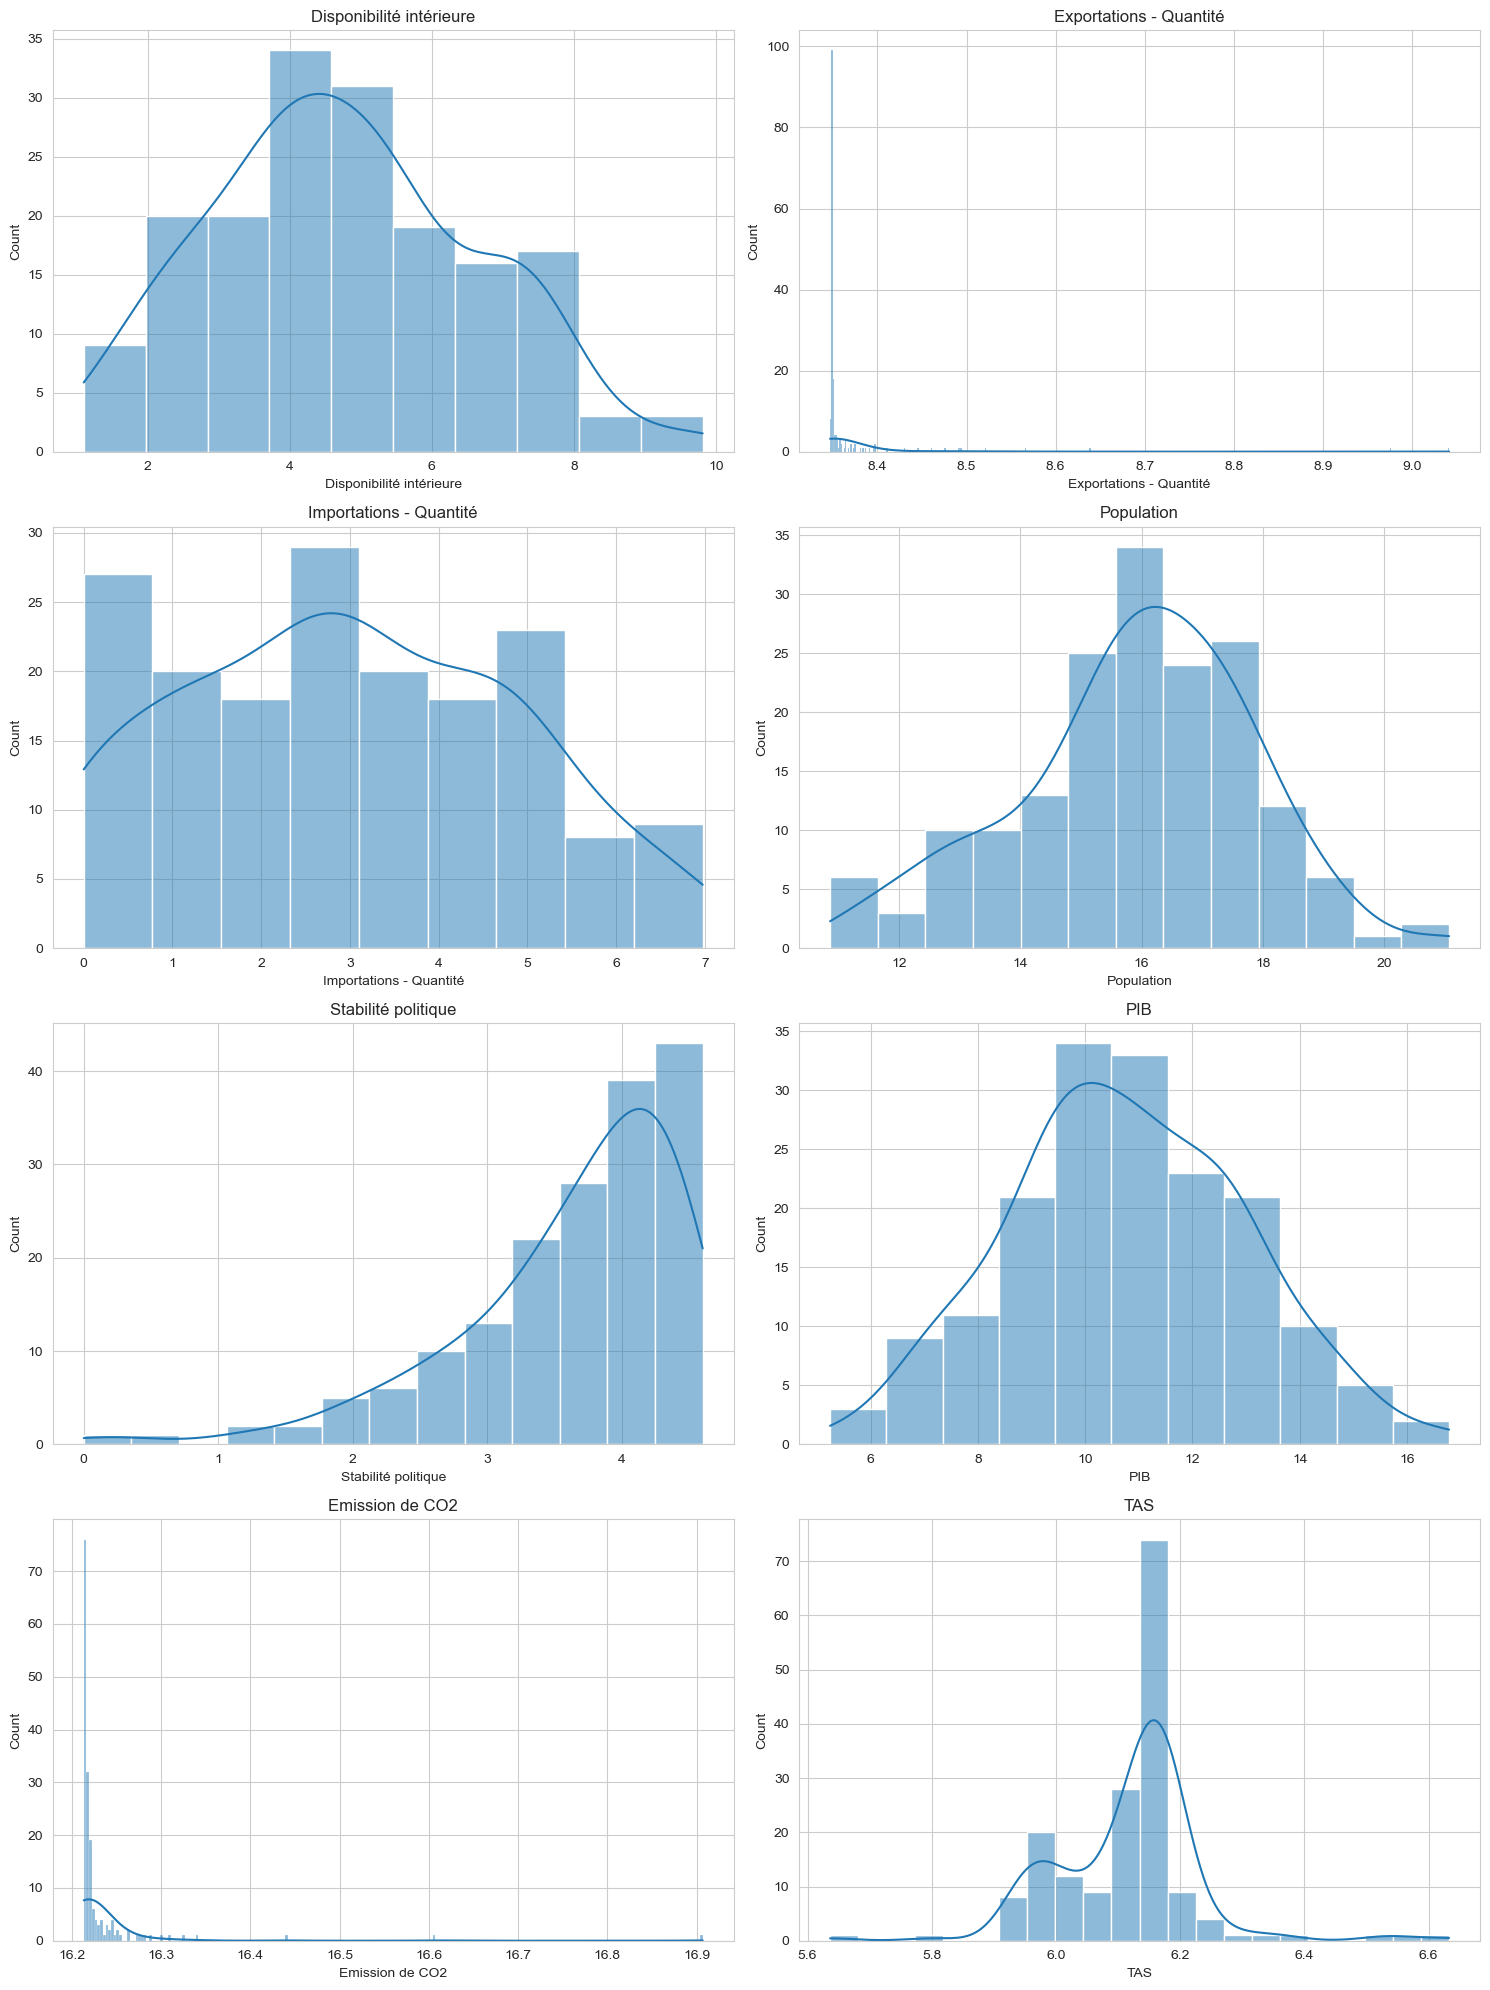

In [48]:
# Déterminer le nombre de lignes et de colonnes en fonction du nombre de variables
num_variables = len(df.columns)
num_rows = math.ceil(num_variables / 2)
num_cols = min(num_variables, 2)

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Tracer les distributions de chaque variable
for i, column in enumerate(df.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(column)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

Les distributions sont quand même mieux réparties qu'au départ. 

## 7. Analyse en Composantes Principales (ACP) <a class="anchor" id="7"></a>

### 7.1 Séparation des données <a class="anchor" id="7_1"></a>

In [49]:
# X la matrice des données
X = df.values

# Vérifions qu'il s'agit bien d'un np.array
type(X)

numpy.ndarray

In [50]:
# Enregistrons nos individus sous la variable 'pays'
pays = df.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=172)

In [51]:
# et nos étiquettes de données sous la variable 'features'
features = df.columns
features

Index(['Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Population', 'Stabilité politique', 'PIB',
       'Emission de CO2', 'TAS'],
      dtype='object')

### 7.2 Centrer et réduire les données <a class="anchor" id="7_2"></a>

In [52]:
# Il faut scaler les données dans un premier temps. On instancie : 
scaler = StandardScaler()

# On entraine le scaler sur nos données : 
scaler.fit(X)

StandardScaler()

In [53]:
# On transforme nos données
X_scaled = scaler.transform(X)
X_scaled[:3]

array([[-0.37672293, -0.26111954,  0.23041656,  0.77497734, -3.86372957,
        -0.41747288, -0.26537218, -0.46501073],
       [ 1.54950856, -0.07517208,  1.74438654,  1.00789416, -0.05470406,
         0.95595091,  0.49429358,  0.11551062],
       [-0.47802863, -0.26111954,  0.37013371, -0.53142426,  0.5740595 ,
        -0.58780428, -0.27081197, -0.95824598]])

In [54]:
# On vérifie que la moyenne est à 0 et que l'écart type est à 1 
idx = ['mean', 'std']

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 7.3 Composantes et pourcentages de variance captés par celles-ci <a class="anchor" id="7_3"></a>

In [55]:
# On va s'intéresser au 7 premières composantes
n_components = 7
pca = PCA(n_components=n_components)

# On l'entraine sur les données scalées
pca.fit(X_scaled)

PCA(n_components=7)

In [56]:
# Intéressons nous maintenant au pourcentage de la variance capté par chaque nouvelle composante.
# on peut utiliser l'attribut explained_variance_ratio_ : 
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([45.79, 17.4 , 13.32,  9.83,  6.89,  4.18,  1.35])

In [57]:
# Et le pourcentage de variance cumulée
scree_cum = scree.cumsum().round()
scree_cum

array([46., 63., 77., 86., 93., 97., 99.])

In [58]:
# Définissons ensuite une variable avec la liste de nos composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

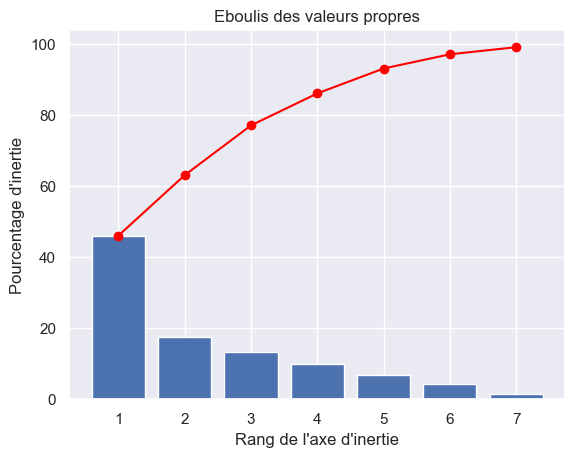

In [59]:
# On charge seaborn
sns.set()

# On peut enfin l'afficher de façon graphique
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c='red', marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et, en rouge la variance cumulée.
On voit ici que 77% de la variance est comprise dans les 3 premières composantes. Et 86% de la variance dans les 4 premières composantes... etc.

On voit qu'on commence à ne plus capter suffisament d'information (formation d'un coude) après la 4ème composante. On va donc ce contanter de 86% de l'information dans les 4 premières composantes principales. 

### 7.4 Graphiques de correlation <a class="anchor" id="7_4"></a>

<Axes: >

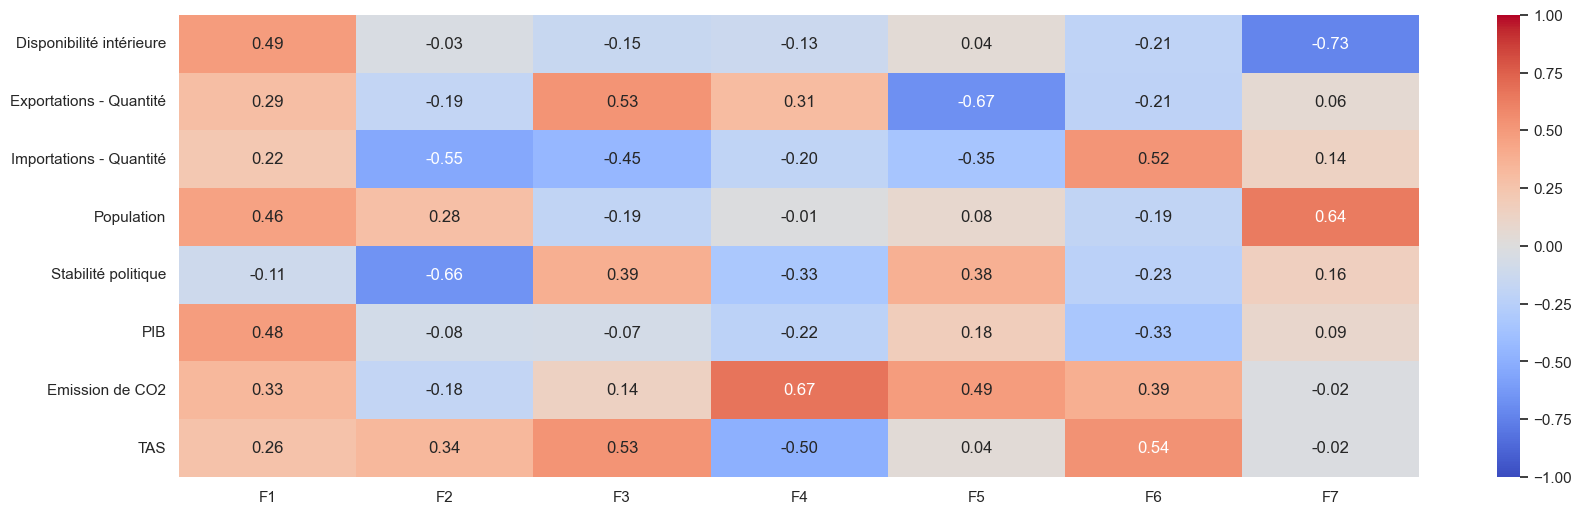

In [60]:
# On va maintenant s'intéresser à nos composantes. On va les obtenir grâce à l'attribut components_
pcs=pca.components_

pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

# Regardons la contribution des axes à nos variables avec une heatmap : 
fig, ax = plt.subplots(figsize=(20,6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='0.2f')

#### 7.4.1 Pour les composantes principales 1 et 2 (F1 et F2) <a class="anchor" id="7_4_1"></a>

In [61]:
# Définissons nos axes x et y.
x, y = 0, 1

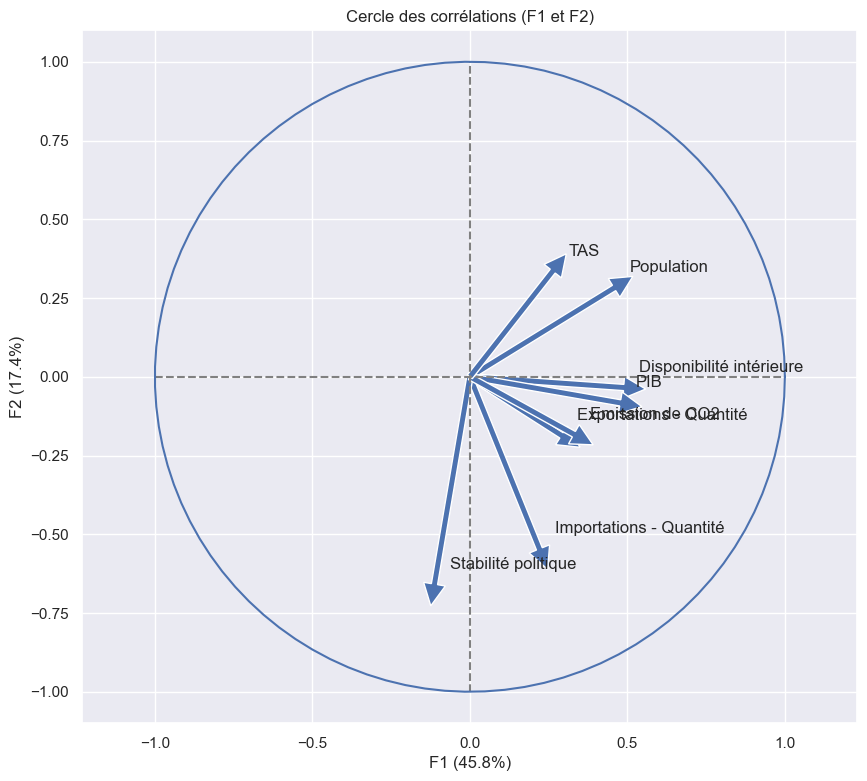

In [62]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

# titre
plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

#### 7.4.2 Projection des pays sur le plan F1 et F2 <a class="anchor" id="7_4_2"></a>

In [63]:
# Fonction : plans factoriels : 
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des pays (sur F{x+1} et F{y+1})")
    plt.show()

In [64]:
# Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace : 
X_proj = pca.transform(X_scaled)

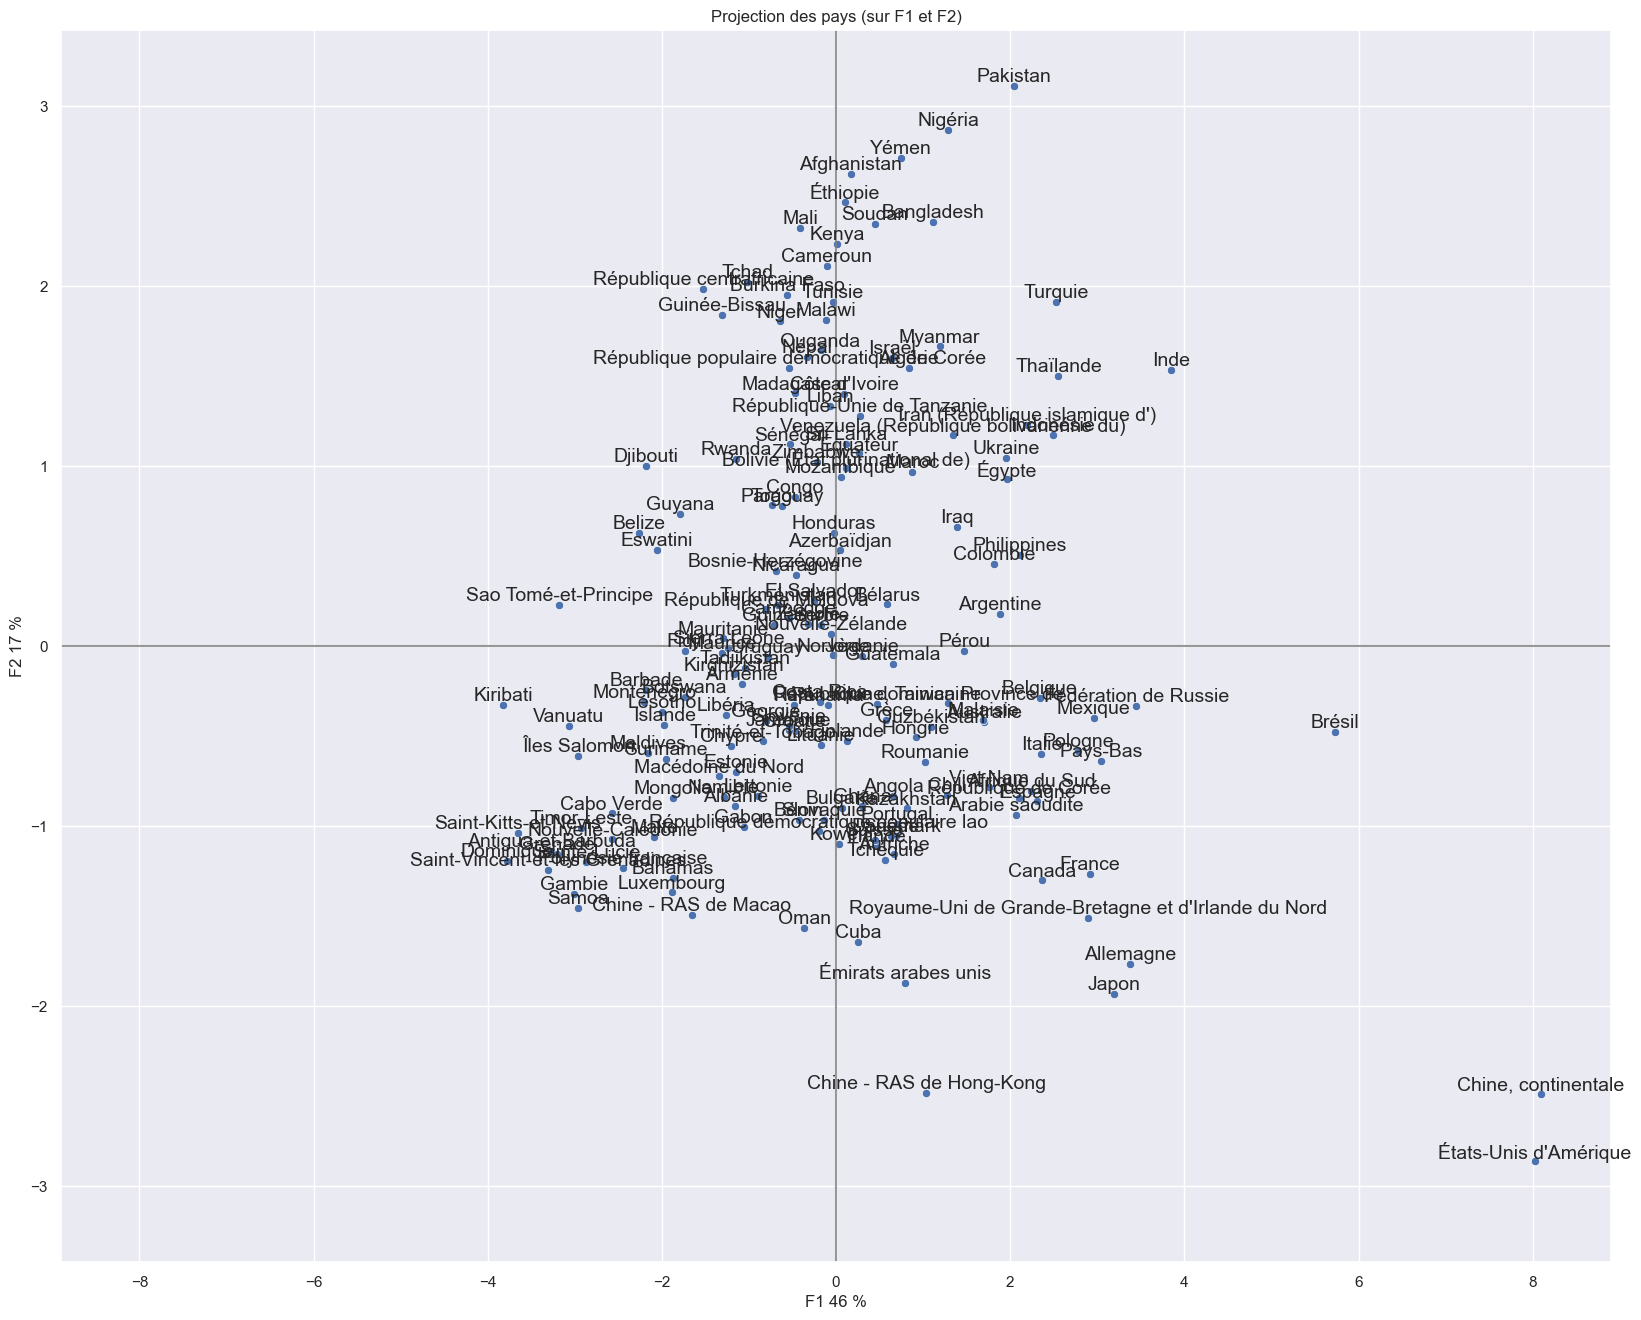

In [65]:
# Définissons x_y pour les deux premiers plans factoriels : 
x_y = (0,1)

display_factorial_planes(X_proj, x_y, pca, labels=pays, figsize=(20,16),marker="o")

#### 7.4.3 Pour les composantes principales 3 et 4 (F3 et F4) <a class="anchor" id="7_4_3"></a>

In [66]:
# Définissons nos axes x et y.
x, y = 2, 3

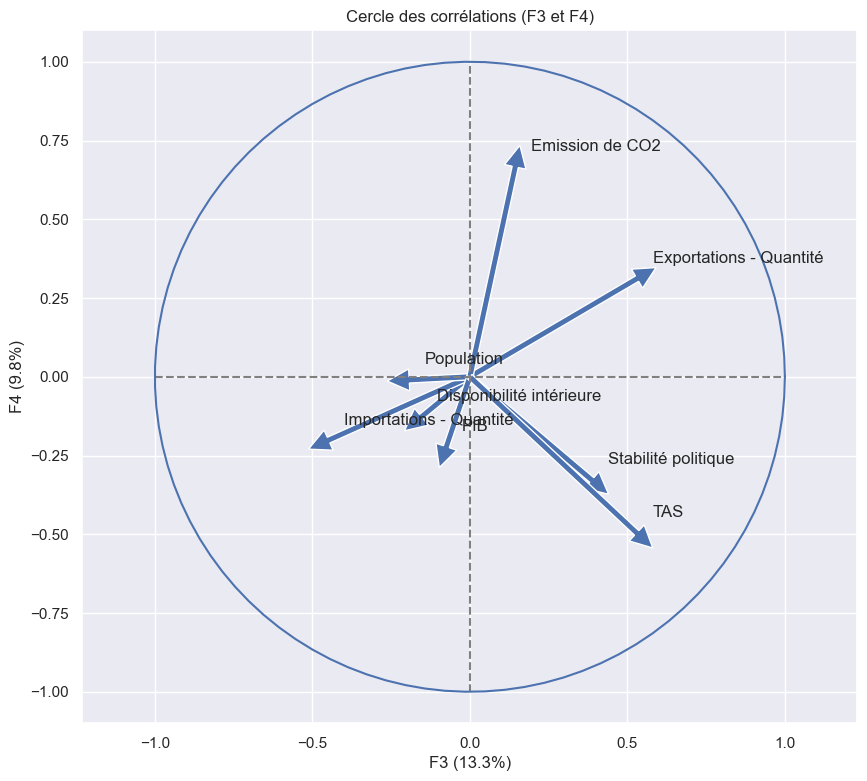

In [67]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #0 for PC3
             pca.components_[3, i],  #1 for PC4
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[2, i] + 0.05,
             pca.components_[3, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

# titre
plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

#### 7.4.4 Projection des pays sur le plan F3 et F4 <a class="anchor" id="7_4_4"></a>

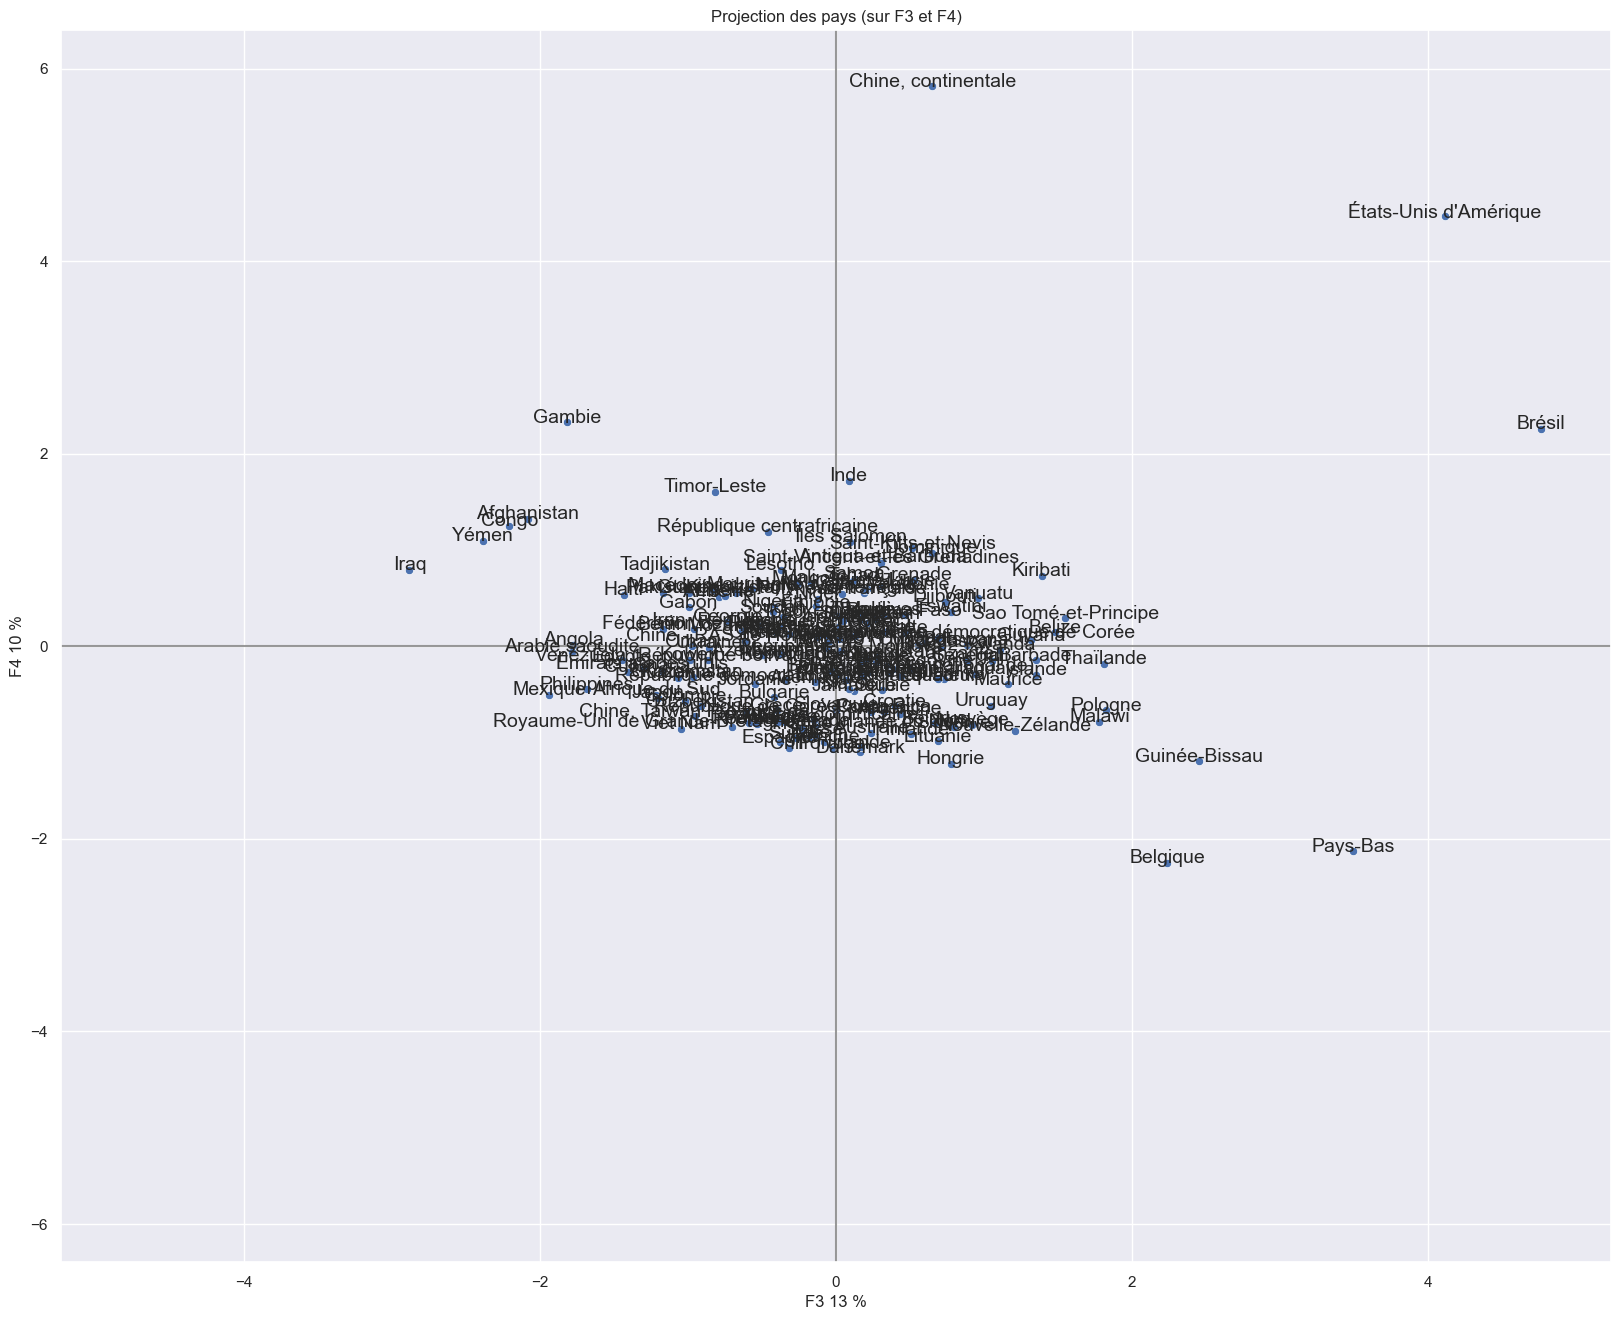

In [68]:
# Définissons x_y pour les deux premiers plans factoriels : 
x_y = (2,3)

display_factorial_planes(X_proj, x_y, pca, labels=pays, figsize=(20,16),marker="o")

#### 7.4.5 Interprétation des 4 premières composantes principales <a class="anchor" id="7_4_5"></a>

Nous pouvons interpréter les variables synthétiques comme suit :

    - F1 représente les pays densément peuplés qui sont de grands consommateurs de viande de volaille ;
    - F2 représente les pays en développement politiquement instables ;
    - F3 représente les pays exportateurs de viande de volaille sur le marché mondial ;
    - F4 représente les pays ayant les plus grandes émissions de pollution.

## 8. Export du Dataframe pour clustering <a class="anchor" id="8"></a>

Et pour plus de logique pour les différents clusters. Nous allons supprimer la France car nous souhaitons exporter. 

In [69]:
# Suppression des données pour la France
df = df.drop('France')

Maintenant que notre Dataframe est propre, nous pouvons l'exporter : 

In [70]:
# On remet les zones en colonne pour l'export
df_export = df.reset_index()
df_export = df_export.rename(columns={'index': 'Zone'})

# Export du nouveau Dataframe en CSV
chemin_fichier_csv = 'C:\\Users\\Basti\\Projets Python\\P9_Produisez une étude de marché avec R ou Python\\df.csv'
df_export.to_csv(chemin_fichier_csv, index=False)

OSError: Cannot save file into a non-existent directory: 'C:\Users\Basti\Projets Python\P9_Produisez une étude de marché avec R ou Python'